## Apply models to new data

In [1]:
#import all necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _pickle as cPickle
from bedmap import ClassifyBedforms
from bedmap.utilities import plot_rate_matrix, thresh
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from bedmap import ClassifyBedforms

New input datasets require columns depicting bed geology "Bed", local topographic conditions "Topo", bedform elongation "Elong", and bedform area "Area". To be able to trace features that are marked as "bedforms" or "not bedforms", rather than just determining performance statistics, numeric columns depicting "site" and "ObjectID" are required. 

In [5]:
#upload data you've collected
newdata = pd.read_csv('~/rf_bedform_mapping/data/wi_McKenziefilter.csv')

In [6]:
newdata.columns

Index(['ORIG_FID', 'Width', 'Length', 'Orient', 'Area', 'Elong', 'Bed', 'Topo',
       'Y/N'],
      dtype='object')

### Run Optimized Random Forest Model on new data
Notes: the input option "model" refers to which model you will run whether that is Random Forest, XGBoost, or the combination ensemble model. Setting "probability=True" will return probabilities of each feature being glacially derived, rather than binary 1/0 values. Setting "probability=False" and not specifying a threshold will default to a threshold of 50%. The input option "threshold" is the probability threshold. Metrics and comparisons for which model and probability threshold are best suited for your data may be found in "performance_metrics.ipynb" and "RandomForest.ipynb".

In [7]:
#optimized model for highest bedform detection probability
rf_bedforms = ClassifyBedforms('~/rf_bedform_mapping/data/wi_McKenziefilter.csv',
                            model='random_forest', 
                            threshold=0.45, probability=False)

In [8]:
#add predictions to the original dataset
rf_predicted_bedforms = rf_bedforms.predicted_bedforms
newdata['rf_bedform_pred'] = rf_predicted_bedforms.tolist()

### Run Optimized XGBoost Model on new data

In [9]:
#optimized model for highest bedform detection probability
xgb_bedforms = ClassifyBedforms('~/rf_bedform_mapping/data/wi_McKenziefilter.csv',
                            model= 'xgboost', 
                            threshold=0.4, probability=False)

In [10]:
#add predictions to the original dataset
xgb_predicted_bedforms = xgb_bedforms.predicted_bedforms
newdata['xgb_bedform_pred'] = xgb_predicted_bedforms.tolist()

### Run Optimized Ensemble Model on new data

In [11]:
#optimized model for highest bedform detection probability
ens_bedforms = ClassifyBedforms('~/rf_bedform_mapping/data/wi_McKenziefilter.csv',
                            model='ensemble_average', 
                            threshold=0.45, probability=False)

In [12]:
#add predictions to the original dataset
ens_predicted_bedforms = ens_bedforms.predicted_bedforms
newdata['ens_bedform_pred'] = ens_predicted_bedforms.tolist()

In [13]:
#Export new datafile with all columns of predicted bedforms
newdata.to_csv('~/rf_bedform_mapping/data/wi_McKenziemodels_output.csv', index=False)

## Using manually-determined accuracy, calculate performance metrics

From the "performance_metrics.ipynb" file, we will be using established performance metrics, or quantitative measures used to assess the effectiveness or quality of model predictions in machine learning tasks. We'll be using metrics available in the `sklearn` library.

### Performance metrics for optimized random forest model

We'll start with the most straightforward measure, called "accuracy," which measures the ratio of correctly classified instances over all instances. The equation is (Number of True Positives + Number of True Negatives)/(Number of all Predictions). The 'measured_bedforms' are the manually determined bedforms from TPI analysis and while seemingly the most accurate, are still subject to human error in their identification. 

In [14]:
measured_bedforms = np.array(newdata['Y/N'])

In [15]:
rf_accuracy = accuracy_score(measured_bedforms, rf_predicted_bedforms)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7727558066541117


"Precision" is also a commonly used metric, and measures the ratio of true positives to all predicted positives. The equation is (Number of True Positives)/(Number of True Positives + Number of False Positives).

In [16]:
rf_precision = precision_score(measured_bedforms, rf_predicted_bedforms)
print("Random Forest Precision:", rf_precision)

Random Forest Precision: 0.5859922178988327


"Recall" measures the ratio of actual positives that are correctly identified by the classifier while accounting for positives missed by the classifier. It's calculated as (Number of True Positives)/(Number of True Positives + Number of False Negatives). Recall can be used to optimize in CV when the cost of false negatives is high, i.e. when a model has a tendency to underpredict, which the current state of our model does.

In [17]:
rf_recall = recall_score(measured_bedforms, rf_predicted_bedforms)
print("Random Forest Recall:", rf_recall)

Random Forest Recall: 0.7968253968253968


The "F1 score" is the harmonic mean between precision and recall. This means that an F1 score provides a balanced measure between precision and recall tipped towards the lower score, making it a useful metric for evaluating classifiers in situations where you want to consider both false positives and false negatives equally.

In [18]:
rf_f1 = f1_score(measured_bedforms, rf_predicted_bedforms)
print("Random Forest F1 Score:", rf_f1)

Random Forest F1 Score: 0.6753363228699552


Finally, the assessment that you might have seen in other papers, the "confusion matrix." The confusion matrix is nice because it allows for easy visualization of the model performance. In our case of binary classficiation, it is a 2x2 matrix showing number of true positives, number of false positives, number of true negatives, and number of false negatives. It can also be measured using `sklearn`.

In [19]:
rf_conf_matrix = confusion_matrix(measured_bedforms, rf_predicted_bedforms)

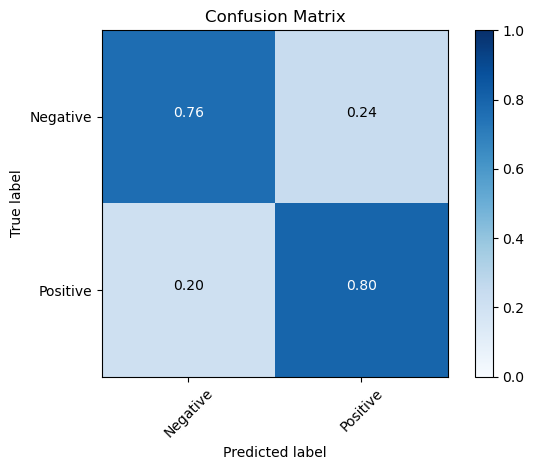

In [20]:
plot_rate_matrix(rf_conf_matrix)

### Performance metrics for optimized XGBoost model

Here we show the same performance metric evaluations as above. For reference to each of these lines, please see notation in the "Performance metrics for optimized random forest model section"

In [21]:
xgb_accuracy = accuracy_score(measured_bedforms, xgb_predicted_bedforms)
print("XGBoost Model Accuracy:", xgb_accuracy)

XGBoost Model Accuracy: 0.7853107344632768


In [22]:
xgb_precision = precision_score(measured_bedforms, xgb_predicted_bedforms)
print("XGBoost Model Precision:", xgb_precision)

XGBoost Model Precision: 0.60431654676259


In [23]:
xgb_recall = recall_score(measured_bedforms, xgb_predicted_bedforms)
print("XGBoost Model Recall:", xgb_recall)

XGBoost Model Recall: 0.8


In [24]:
xgb_f1 = f1_score(measured_bedforms, xgb_predicted_bedforms)
print("XGBoost Model F1 Score:", xgb_f1)

XGBoost Model F1 Score: 0.6885245901639344


In [25]:
xgb_conf_matrix = confusion_matrix(measured_bedforms, xgb_predicted_bedforms)

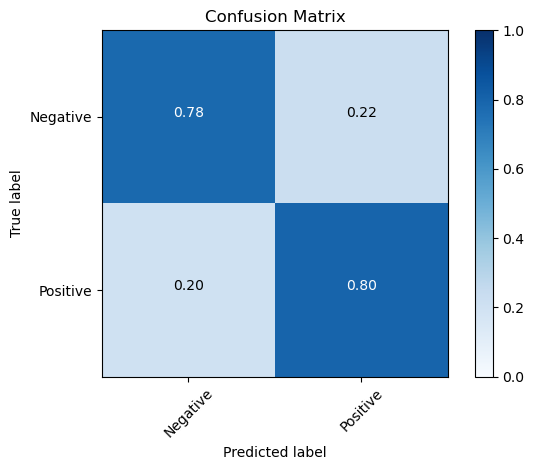

In [26]:
plot_rate_matrix(xgb_conf_matrix)

### Performance metrics for optimized Ensemble model

Here we show the same performance metric evaluations as above. For reference to each of these lines, please see notation in the "Performance metrics for optimized random forest model section"

In [27]:
ens_accuracy = accuracy_score(measured_bedforms, ens_predicted_bedforms)
print("Ensemble Model Accuracy:", ens_accuracy)

Ensemble Model Accuracy: 0.7846829880728186


In [28]:
ens_precision = precision_score(measured_bedforms, ens_predicted_bedforms)
print("Ensemble Model Precision:", ens_precision)

Ensemble Model Precision: 0.6121212121212121


In [29]:
ens_recall = recall_score(measured_bedforms, ens_predicted_bedforms)
print("Ensemble Model Recall:", ens_recall)

Ensemble Model Recall: 0.7481481481481481


In [30]:
ens_f1 = f1_score(measured_bedforms, ens_predicted_bedforms)
print("Ensemble Model F1 Score:", ens_f1)

Ensemble Model F1 Score: 0.6733333333333333


In [31]:
ens_conf_matrix = confusion_matrix(measured_bedforms, ens_predicted_bedforms)

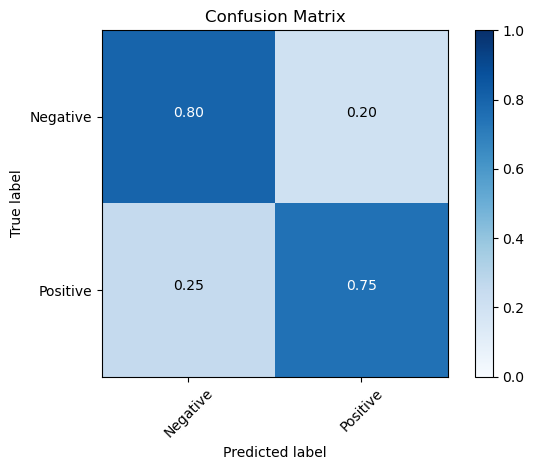

In [32]:
plot_rate_matrix(ens_conf_matrix)

## Visualizing the ROC Curve and F1 Score for all three fits

The ROC curve is a measure of how much overprediction is necessary to capture all of the true bedforms. Ideally, we would detect all bedforms without making any overpredictions (false positives), but more typically some overpredictions are made. A curve with an area under the curve (AUC) closer to 1 means that the corresponding model is better at finding more true positives without as many false positives. 

The F1 score as a function of probability threshold indicates the optimal probability threshold for a particular model to be used at. This tells us if we're using the optimal thresholding in our predictions to get at the most true positives with the least false positives and false negatives.

In [33]:
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import RocCurveDisplay

First we'll calculate the ROCs and AUCs for each model:

In [34]:
rf_estimated_bedforms = ClassifyBedforms('~/rf_bedform_mapping/data/wi_McKenziefilter.csv',
                                         model='random_forest', 
                                         probability=True).predicted_bedforms

xgb_estimated_bedforms = ClassifyBedforms('~/rf_bedform_mapping/data/wi_McKenziefilter.csv',
                                          model='xgboost', 
                                          probability=True).predicted_bedforms

ens_estimated_bedforms = ClassifyBedforms('~/rf_bedform_mapping/data/wi_McKenziefilter.csv',
                                          model='ensemble_average', 
                                          probability=True).predicted_bedforms

In [35]:
# Calculate ROC curves and AUCs for each model
fpr_ens, tpr_ens, _ = roc_curve(measured_bedforms, ens_estimated_bedforms)
roc_auc_ens = auc(fpr_ens, tpr_ens)

fpr_rf, tpr_rf, _ = roc_curve(measured_bedforms, rf_estimated_bedforms)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(measured_bedforms, xgb_estimated_bedforms)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

Next we'll calculate the F1 score as a function of estimate probability for each model.

In [36]:
thresholds = np.concatenate((np.arange(0.01,0.1,0.01), np.arange(0.1,0.9,0.05), np.arange(0.9,1,0.01)))
rf_thresh_arrays = np.zeros((len(thresholds),len(rf_estimated_bedforms)))
xgb_thresh_arrays = np.zeros((len(thresholds),len(xgb_estimated_bedforms)))
ens_thresh_arrays = np.zeros((len(thresholds),len(ens_estimated_bedforms)))

In [37]:
def thresh(arr, threshold):
    thresholded_arr = (arr >= threshold).astype(int)

    return thresholded_arr

In [38]:
for idx in range(len(rf_thresh_arrays)):
    rf_thresh_arrays[idx] =  thresh(rf_estimated_bedforms, thresholds[idx])
    xgb_thresh_arrays[idx] =  thresh(xgb_estimated_bedforms, thresholds[idx])
    ens_thresh_arrays[idx] =  thresh(ens_estimated_bedforms, thresholds[idx])

In [39]:
rf_f1s = np.zeros(len(thresholds))
xgb_f1s = np.zeros(len(thresholds))
ens_f1s = np.zeros(len(thresholds))

for idx in range(len(thresholds)):
    rf_f1s[idx] = f1_score(measured_bedforms, rf_thresh_arrays[idx])
    xgb_f1s[idx] = f1_score(measured_bedforms, xgb_thresh_arrays[idx])
    ens_f1s[idx] = f1_score(measured_bedforms, ens_thresh_arrays[idx])

Finally, plot up the results.

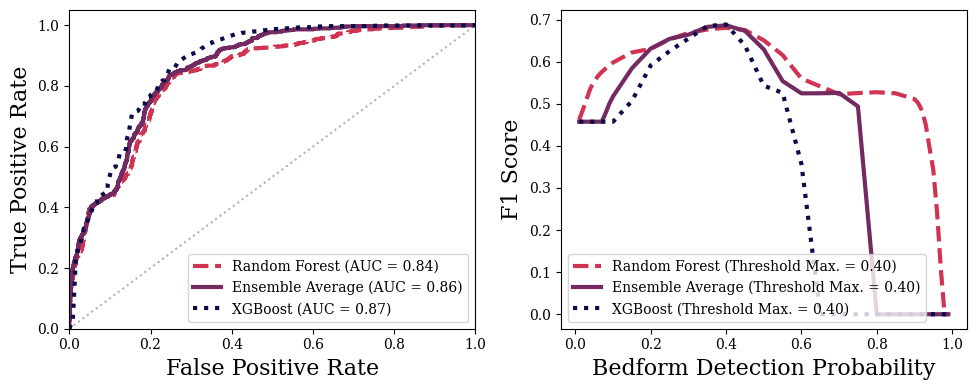

In [42]:
plt.rcParams['font.family'] = 'DejaVu Serif'

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot ROC curves for each model on the same plot
axs[0].plot(fpr_rf, tpr_rf, 
             color='#d13453', linestyle='--', lw=3, 
             label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
axs[0].plot(fpr_ens, tpr_ens, 
             color='#732a61', lw=3,
             label='Ensemble Average (AUC = %0.2f)' % roc_auc_ens)
axs[0].plot(fpr_xgb, tpr_xgb, 
             color='#0c0c4a', linestyle=':', lw=3, 
             label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

axs[0].plot([0, 1], [0, 1], color='k', 
             linestyle=':', alpha=0.3)
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate', fontsize=16)
axs[0].set_ylabel('True Positive Rate', fontsize=16)
axs[0].legend(loc="lower right")

# Right plot
axs[1].plot(thresholds, rf_f1s, 
             color='#d13453', linestyle='--', lw=3, 
             label='Random Forest (Threshold Max. = %0.2f)' % thresholds[np.argmax(rf_f1s)])
axs[1].plot(thresholds, ens_f1s, 
             color='#732a61', lw=3,
             label='Ensemble Average (Threshold Max. = %0.2f)' % thresholds[np.argmax(ens_f1s)])
axs[1].plot(thresholds, xgb_f1s, 
             color='#0c0c4a', linestyle=':', lw=3, 
             label='XGBoost (Threshold Max. = %0.2f)' % thresholds[np.argmax(xgb_f1s)])
axs[1].legend(loc='lower left')
axs[1].set_xlabel('Bedform Detection Probability', fontsize=16)
axs[1].set_ylabel('F1 Score', fontsize=16)

plt.tight_layout()

### Creating a combined ROC/F1 figure with the cross-validation curves

First we'll import the cross validation data.

In [41]:
fpr_cv_ens, fpr_cv_rf, fpr_cv_xgb = np.load('../figs/roc_figure/fpr.npy', allow_pickle=True)
tpr_cv_ens, tpr_cv_rf, tpr_cv_xgb = np.load('../figs/roc_figure/tpr.npy', allow_pickle=True)
roc_auc_cv_ens, roc_auc_cv_rf, roc_auc_cv_xgb = np.load('../figs/roc_figure/auc.npy', allow_pickle=True)
ens_f1s_cv, rf_f1s_cv, xgb_f1s_cv = np.load('../figs/roc_figure/f1.npy', allow_pickle=True)

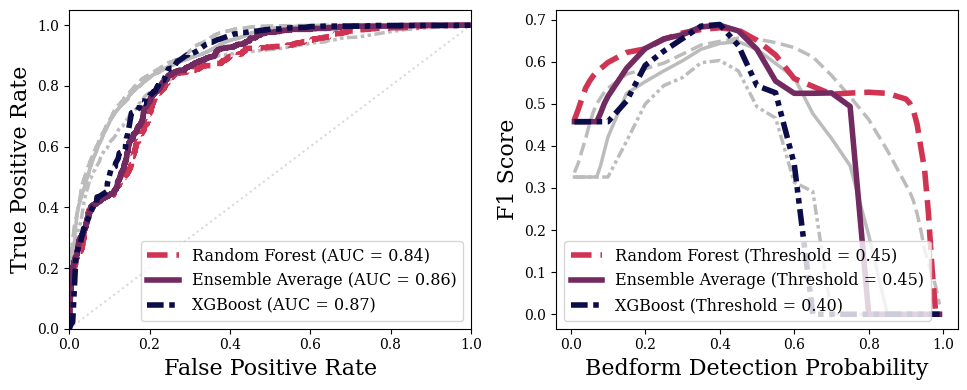

In [43]:
plt.rcParams['font.family'] = 'DejaVu Serif'

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot ROC curves for each model on the same plot
axs[0].plot(fpr_rf, tpr_rf, 
             color='#d13453', linestyle='--', lw=4, 
             label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
axs[0].plot(fpr_ens, tpr_ens, 
             color='#732a61', lw=4,
             label='Ensemble Average (AUC = %0.2f)' % roc_auc_ens)
axs[0].plot(fpr_xgb, tpr_xgb, 
             color='#0c0c4a', linestyle=(0, (3, 1, 1, 1, 1, 1)), lw=4, 
             label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

# Plot ROC curves for the cross-validation models
axs[0].plot(fpr_cv_rf, tpr_cv_rf, 
            color='#bcbcbc', linestyle='--', lw=2.5,
            zorder=0, label=''
             # label='Random Forest (AUC = %0.2f)' % roc_auc_cv_rf
           )
axs[0].plot(fpr_cv_ens, tpr_cv_ens, 
            color='#bcbcbc', lw=2.5,
            zorder=0, label=''
             # label='Ensemble Average (AUC = %0.2f)' % roc_auc_cv_ens
           )
axs[0].plot(fpr_cv_xgb, tpr_cv_xgb, 
            color='#bcbcbc', linestyle=(0, (3, 1, 1, 1, 1, 1)), lw=2.5,
            zorder=0, label=''
             # label='XGBoost (AUC = %0.2f)' % roc_auc_cv_xgb
           )

axs[0].plot([0, 1], [0, 1], color='k', 
             linestyle=':', alpha=0.15)

axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])


axs[0].set_xlabel('False Positive Rate', fontsize=16)
axs[0].set_ylabel('True Positive Rate', fontsize=16)
axs[0].legend(loc="lower right", fontsize=11.5)

# Plot F1 curves for each model on the same plot
axs[1].plot(thresholds, rf_f1s, 
            color='#d13453', linestyle='--', lw=4, 
            label='Random Forest (Threshold = %0.2f)' % thresholds[np.argmax(rf_f1s_cv)])
axs[1].plot(thresholds, ens_f1s, 
            color='#732a61', lw=4,
            label='Ensemble Average (Threshold = %0.2f)' % thresholds[np.argmax(ens_f1s_cv)])
axs[1].plot(thresholds, xgb_f1s, 
            color='#0c0c4a', linestyle=(0, (3, 1, 1, 1, 1, 1)), lw=4, 
            label='XGBoost (Threshold = %0.2f)' % thresholds[np.argmax(xgb_f1s_cv)])

# Plot F1 curves for the cross-validation models
axs[1].plot(thresholds, rf_f1s_cv, 
            color='#bcbcbc', linestyle='--', lw=2.5, 
            zorder=0, label=''
           )
axs[1].plot(thresholds, ens_f1s_cv, 
            color='#bcbcbc', lw=2.5,
            zorder=0, label=''
           )
axs[1].plot(thresholds, xgb_f1s_cv, 
            color='#bcbcbc', linestyle=(0, (3, 1, 1, 1, 1, 1)), lw=2.5,
            zorder=0, label=''
           )

axs[1].legend(loc='lower left', fontsize=11.5)
axs[1].set_xlabel('Bedform Detection Probability', fontsize=16)
axs[1].set_ylabel('F1 Score', fontsize=16)

plt.tight_layout()

plt.savefig('../figs/detection_threshold.pdf', format='pdf')

## Investigating False Positives and False Negatives for Each Model

Let's look at where these datasets overlap first. Here are the FIDs for all of the bedforms that were detected by all of the models:

In [44]:
overlap_mask = (measured_bedforms==1) & (ens_predicted_bedforms==1) & (rf_predicted_bedforms==1) & (xgb_predicted_bedforms==1)

In [45]:
overlap_data = newdata[overlap_mask]

In [46]:
overlap_data['ORIG_FID']

28        1930
30        2036
33        2108
41        2214
46        2334
         ...  
3129    155163
3142    155874
3144    155944
3166    156933
3173    156960
Name: ORIG_FID, Length: 683, dtype: int64

Here are the Random Forest False Positives and False Negatives:

In [47]:
rf_fps = newdata[(measured_bedforms==0) & (rf_predicted_bedforms==1)]

In [48]:
#Random forest false positives
len(rf_fps)

532

In [49]:
rf_fns = newdata[(measured_bedforms==1) & (rf_predicted_bedforms==0)]

In [50]:
#Random forest false negatives
len(rf_fns)

192

Here are the XGBoost False Positives and False Negatives

In [51]:
xgb_fps = newdata[(measured_bedforms==0) & (xgb_predicted_bedforms==1)]

In [52]:
#XGBoost false positives
len(xgb_fps)

495

In [53]:
xgb_fns = newdata[(measured_bedforms==1) & (xgb_predicted_bedforms==0)]

In [54]:
#XGBoost false negatives
len(xgb_fns)

189

Here are the Ensemble Average False Positives and False Negatives

In [55]:
ens_fps = newdata[(measured_bedforms==0) & (ens_predicted_bedforms==1)]

In [56]:
#Ensemble false positives
len(ens_fps)

448

In [57]:
ens_fns = newdata[(measured_bedforms==1) & (ens_predicted_bedforms==0)]

In [58]:
#Emsemble false negatives
len(ens_fns)

238

The statistics explored in the Jupyter notebook are standard for comparison between model performance metrics. If this code is used in other work, please cite Abrahams & McKenzie, 2024 [https://zenodo.org/doi/10.5281/zenodo.11660146]